#### Importing machine learning libraries

In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt

#### importing library to fetch data from twitter

In [2]:
import tweepy
import csv
import random

#### setting up consumer key and access token

In [3]:
consumer_key    = '3jmA1BqasLHfItBXj3KnAIGFB'
consumer_secret = 'imyEeVTctFZuK62QHmL1I0AUAMudg5HKJDfkx0oR7oFbFinbvA'

access_token  = '265857263-pF1DRxgIcxUbxEEFtLwLODPzD3aMl6d4zOKlMnme'
access_token_secret = 'uUFoOOGeNJfOYD3atlcmPtaxxniXxQzAU4ESJLopA1lbC'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

#### Fetching tweets in extended mode (entire tweet  not just few words + link)

In [4]:
fetch_tweets=tweepy.Cursor(api.search, q="#Jio",count=1000, lang ="en",start="2016-09-06", tweet_mode="extended").items()
data=pd.DataFrame(data=[[tweet_info.created_at.date(),tweet_info.full_text]for tweet_info in fetch_tweets],columns=['Date','Tweets'])

In [5]:
data

,Date,Tweets
0,2019-10-20,"@JioCare Thanks for your response, but i would..."
1,2019-10-20,RT @namitha29: I want strict action against wa...
2,2019-10-20,@reliancejio Really you have made your custome...
3,2019-10-20,@reliancejio @JioCare @jio Network is very Poo...
4,2019-10-20,Jio Network is very Poor... no Connectivity in...
5,2019-10-20,@JioCare And here is the most blazing fast spe...
6,2019-10-20,RT @sanjear7: I am not able to call any #BSNL ...
7,2019-10-20,#Jio #Ban6paisa #jiousers If you have commitme...
8,2019-10-20,RT @ABPNews: #Jio Slams Trai's IUC Review As A...
9,2019-10-20,RT @namitha29: I want strict action against wa...


#### Removing special character from each tweets

In [6]:
data.to_csv("Tweets.csv")
cdata=pd.DataFrame(columns=['Date','Tweets'])
total=100
index=0
for index,row in data.iterrows():
    stre=row["Tweets"]
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    cdata.sort_index()
    cdata.set_value(index,'Date',row["Date"])
    cdata.set_value(index,'Tweets',my_new_string)
    index=index+1
#print(cdata.dtypes)

/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


#### Displaying the data with date and tweets, you can notice there are multiple tweets for each day. So we will club them together later.

In [7]:
cdata

,Date,Tweets
0,2019-10-20,JioCare Thanks for your response but i would r...
1,2019-10-20,RT namitha29 I want strict action against ward...
2,2019-10-20,reliancejio Really you have made your customer...
3,2019-10-20,reliancejio JioCare jio Network is very Poor n...
4,2019-10-20,Jio Network is very Poor no Connectivity in mi...
5,2019-10-20,JioCare And here is the most blazing fast spee...
6,2019-10-20,RT sanjear7 I am not able to call any BSNL no ...
7,2019-10-20,Jio Ban6paisa jiousers If you have commitment ...
8,2019-10-20,RT ABPNews Jio Slams Trais IUC Review As AntiP...
9,2019-10-20,RT namitha29 I want strict action against ward...


#### Creating a dataframe where we will combine the tweets date wise and store into

In [8]:
ccdata=pd.DataFrame(columns=['Date','Tweets'])

In [9]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.Date.iloc[i]
    next_date=cdata.Date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.Tweets.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.set_value(indx,'Date',get_date)
        ccdata.set_value(indx,'Tweets',get_tweet)
        indx=indx+1
        get_tweet=" "

/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


#### All the tweets has been clubbed as per their date.

In [10]:
ccdata

,Date,Tweets
0,2019-10-20,JioCare Thanks for your response but i would r...
1,2019-10-19,RT TestFiber Checking your internet speed wit...
2,2019-10-18,RT SanjuVerma RILresultsphenomenal with GRMs ...
3,2019-10-17,RT viralrg JioCare Currently Im in Fairlands ...
4,2019-10-16,RT SharmaUmanandan dhruvrathee Please write s...
5,2019-10-15,RT LeoKnock Airtel Idea amp Vodafone after wa...
6,2019-10-14,RT macsingle75 pavansethi Nita39128541 AAPfor...
7,2019-10-13,RT LeoKnock Airtel Idea amp Vodafone after wa...
8,2019-10-12,Jio Calls Are Free No IUC Charges httpstcoW...


#### Now to know the "closing price" of each day we will import STOCK PRICE DATA for UNITED AIRLINES from "yahoo.finance". We will consider "Close" price only.

In [11]:
read_stock_p=pd.read_csv('RELIANCE.NS.csv')
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-11,1363.699951,1365.599976,1336.550049,1352.599976,1352.599976,7587648
1,2019-10-14,1364.949951,1364.949951,1350.849976,1358.000000,1358.000000,6123412
2,2019-10-15,1362.500000,1370.000000,1354.300049,1364.150024,1364.150024,4422075
3,2019-10-16,1369.900024,1379.650024,1363.699951,1372.349976,1372.349976,8870701
4,2019-10-17,1375.000000,1399.000000,1372.000000,1396.500000,1396.500000,7332464
5,2019-10-18,1404.000000,1427.900024,1398.699951,1416.349976,1416.349976,12856410


#### Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe.

In [12]:
ccdata['Prices']=""

In [13]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            print("Success")
            break

Success
Success
Success
Success
Success


/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


#### Prices are fetched but some entires are blank as close price might not be available for that day due to some reason (like holiday, etc.)

In [14]:
ccdata

,Date,Tweets,Prices
0,2019-10-20,JioCare Thanks for your response but i would r...,
1,2019-10-19,RT TestFiber Checking your internet speed wit...,
2,2019-10-18,RT SanjuVerma RILresultsphenomenal with GRMs ...,1416
3,2019-10-17,RT viralrg JioCare Currently Im in Fairlands ...,1396
4,2019-10-16,RT SharmaUmanandan dhruvrathee Please write s...,1372
5,2019-10-15,RT LeoKnock Airtel Idea amp Vodafone after wa...,1364
6,2019-10-14,RT macsingle75 pavansethi Nita39128541 AAPfor...,1358
7,2019-10-13,RT LeoKnock Airtel Idea amp Vodafone after wa...,
8,2019-10-12,Jio Calls Are Free No IUC Charges httpstcoW...,


#### So we take the mean for the close price and put it in the blank value

In [15]:
mean=0
summ=0
count=0
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]!=""):
        summ=summ+int(ccdata.Prices.iloc[i])
        count=count+1
mean=summ/count
for i in range(0,len(ccdata)):
    if(ccdata.Prices.iloc[i]==""):
        ccdata.Prices.iloc[i]=int(mean)

#### Now all the entries have some value

In [16]:
ccdata

,Date,Tweets,Prices
0,2019-10-20,JioCare Thanks for your response but i would r...,1381
1,2019-10-19,RT TestFiber Checking your internet speed wit...,1381
2,2019-10-18,RT SanjuVerma RILresultsphenomenal with GRMs ...,1416
3,2019-10-17,RT viralrg JioCare Currently Im in Fairlands ...,1396
4,2019-10-16,RT SharmaUmanandan dhruvrathee Please write s...,1372
5,2019-10-15,RT LeoKnock Airtel Idea amp Vodafone after wa...,1364
6,2019-10-14,RT macsingle75 pavansethi Nita39128541 AAPfor...,1358
7,2019-10-13,RT LeoKnock Airtel Idea amp Vodafone after wa...,1381
8,2019-10-12,Jio Calls Are Free No IUC Charges httpstcoW...,1381


#### Making "prices" column as integer so mathematical operations could be performed easily.

In [17]:
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

#### Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. Comp is "Compound" it will tell whether the statement is overall negative or positive. If it has negative value then it is negative, if it has positive value then it is positive. If it has value 0, then it is neutral.

In [18]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2019-10-20,JioCare Thanks for your response but i would r...,1381,,,,
1,2019-10-19,RT TestFiber Checking your internet speed wit...,1381,,,,
2,2019-10-18,RT SanjuVerma RILresultsphenomenal with GRMs ...,1416,,,,
3,2019-10-17,RT viralrg JioCare Currently Im in Fairlands ...,1396,,,,
4,2019-10-16,RT SharmaUmanandan dhruvrathee Please write s...,1372,,,,
5,2019-10-15,RT LeoKnock Airtel Idea amp Vodafone after wa...,1364,,,,
6,2019-10-14,RT macsingle75 pavansethi Nita39128541 AAPfor...,1358,,,,
7,2019-10-13,RT LeoKnock Airtel Idea amp Vodafone after wa...,1381,,,,
8,2019-10-12,Jio Calls Are Free No IUC Charges httpstcoW...,1381,,,,


#### Downloading this package was essential to perform sentiment analysis.

In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ram/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### This part of the code is responsible for assigning the polarity for each statement. That is how much positive, negative, neutral you statement is. And also assign the compound value that is overall sentiment of the statement.

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [21]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2019-10-20,JioCare Thanks for your response but i would r...,1381,-0.9909,0.108,0.799,0.092
1,2019-10-19,RT TestFiber Checking your internet speed wit...,1381,0.9963,0.106,0.773,0.121
2,2019-10-18,RT SanjuVerma RILresultsphenomenal with GRMs ...,1416,0.9998,0.055,0.864,0.081
3,2019-10-17,RT viralrg JioCare Currently Im in Fairlands ...,1396,0.2667,0.082,0.831,0.086
4,2019-10-16,RT SharmaUmanandan dhruvrathee Please write s...,1372,1,0.074,0.79,0.136
5,2019-10-15,RT LeoKnock Airtel Idea amp Vodafone after wa...,1364,0.9995,0.066,0.844,0.091
6,2019-10-14,RT macsingle75 pavansethi Nita39128541 AAPfor...,1358,0.9997,0.094,0.776,0.13
7,2019-10-13,RT LeoKnock Airtel Idea amp Vodafone after wa...,1381,0.9999,0.089,0.777,0.134
8,2019-10-12,Jio Calls Are Free No IUC Charges httpstcoW...,1381,1,0.106,0.745,0.15


#### Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same.

% of positive tweets=  88.88888888888889
% of negative tweets=  11.11111111111111


[]

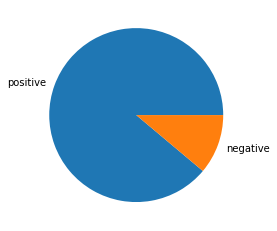

In [22]:
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

#### Making a new dataframe with necessary columns for providing machine learning.

In [23]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [24]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2019-10-20,1381,-0.9909,0.108,0.799,0.092
1,2019-10-19,1381,0.9963,0.106,0.773,0.121
2,2019-10-18,1416,0.9998,0.055,0.864,0.081
3,2019-10-17,1396,0.2667,0.082,0.831,0.086
4,2019-10-16,1372,1,0.074,0.79,0.136
5,2019-10-15,1364,0.9995,0.066,0.844,0.091
6,2019-10-14,1358,0.9997,0.094,0.776,0.13
7,2019-10-13,1381,0.9999,0.089,0.777,0.134
8,2019-10-12,1381,1,0.106,0.745,0.15


#### Dividing the dataset into train and test.

In [25]:
train_start_index = '0'
train_end_index = '6'
test_start_index = '7'
test_end_index = '9'
train = df_.ix[train_start_index : train_end_index]
test = df_.ix[test_start_index:test_end_index]

/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


#### Making a 2D array that will store the Negative and Positive sentiment for Training dataset.

In [26]:
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [27]:
print(numpy_df_train)

[[0.108 0.092]
 [0.106 0.121]
 [0.055 0.081]
 [0.082 0.086]
 [0.074 0.136]
 [0.066 0.091]
 [0.094 0.13 ]]


#### Making a 2D array that will store the Negative and Positive sentiment for Testing dataset.

In [28]:
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [29]:
print(numpy_df_test)

[[0.089 0.134]
 [0.106 0.15 ]]


#### Making 2 dataframe for Training and Testing "Prices". You can also make 1-D array for the same.

In [30]:
y_train = pd.DataFrame(train['Prices'])
#y_train=[91,91,91,92,91,92,91]
y_test = pd.DataFrame(test['Prices'])
print(y_train)

   Prices
0    1381
1    1381
2    1416
3    1396
4    1372
5    1364
6    1358


In [31]:
pip install treeinterpreter

Note: you may need to restart the kernel to use updated packages.


#### Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value (like class-lables in iris dataset))

In [32]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/Users/ram/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Making Predictions

In [33]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [34]:
print(prediction)

[[1371. ]
 [1377.8]]


#### Importing matplotlib library for plotting graph

In [35]:
import matplotlib.pyplot as plt

#### Defining index position for the test data. Making dataframe for the predicted value.

In [36]:
idx=np.arange(int(test_start_index),int(test_end_index))
idx
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [37]:
predictions_df_

,Prices
7,1371.0
8,1377.8


#### Plotting the graph for the Predicted_price VS Actual Price

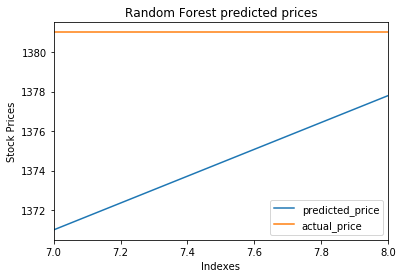

In [38]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
fig.savefig("random forest.png")

In [39]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
reg.predict(numpy_df_test)

array([[1365.78467918],
       [1354.97687243]])

### NOTE: Since our dataset is very small and as you can see that fetching limited tweets could only make data for just 8 days.Also the prediction is not very great in such small dataset. So we found this new dataset on internet which has the Text as "Tweets" and respective "close price" and "Adjusted close price".


### Adjusted Close Price: An adjusted closing price is a stock's closing price on any given day of trading that has been amended to include any distributions and corporate actions that occurred at any time before the next day's open.

In [41]:
stocks_dataf = pd.read_pickle('Twitter_Dataset.pkl')
stocks_dataf.columns=['closing_price','adj_close_price','Tweets']

## New dataset

In [42]:
stocks_dataf

,closing_price,adj_close_price,Tweets
2007-01-01,12469.971875,12469.971875,. What Sticks from '06. Somalia Orders Islamis...
2007-01-02,12472.245703,12472.245703,. Heart Health: Vitamin Does Not Prevent Death...
2007-01-03,12474.519531,12474.519531,. Google Answer to Filling Jobs Is an Algorith...
2007-01-04,12480.690430,12480.690430,. Helping Make the Shift From Combat to Commer...
2007-01-05,12398.009766,12398.009766,. Rise in Ethanol Raises Concerns About Corn a...
2007-01-06,12406.503255,12406.503255,. A Status Quo Secretary General. Best Buy and...
2007-01-07,12414.996745,12414.996745,. THE COMMON APPLICATION; Typo.com. Jumbo Bonu...
2007-01-08,12423.490234,12423.490234,. VW Group’s Sales Rose Sharply in 2006. Conso...
2007-01-09,12416.599609,12416.599609,. The Claim: Hot Leftovers Should Cool at Roo...
2007-01-10,12442.160156,12442.160156,. Love Among the Ruins. Dell Says Plant a Tree...


#### Removing dot (.) and space from the Tweets

In [43]:
stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
stocks_dataf = stocks_dataf[['adj_close_price', 'Tweets']]
stocks_dataf['Tweets'] = stocks_dataf['Tweets'].map(lambda x: x.lstrip('.-'))
stocks_dataf

/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,adj_close_price,Tweets
2007-01-01,12469,What Sticks from '06. Somalia Orders Islamist...
2007-01-02,12472,Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03,12474,Google Answer to Filling Jobs Is an Algorithm...
2007-01-04,12480,Helping Make the Shift From Combat to Commerc...
2007-01-05,12398,Rise in Ethanol Raises Concerns About Corn as...
2007-01-06,12406,A Status Quo Secretary General. Best Buy and ...
2007-01-07,12414,THE COMMON APPLICATION; Typo.com. Jumbo Bonus...
2007-01-08,12423,VW Group’s Sales Rose Sharply in 2006. Consol...
2007-01-09,12416,The Claim: Hot Leftovers Should Cool at Room...
2007-01-10,12442,"Love Among the Ruins. Dell Says Plant a Tree,..."


Making new dataframe and only considering "Adjusted close price". And date as index vlaue.

In [44]:
dataframe = stocks_dataf[['adj_close_price']].copy()

In [45]:
dataframe["Comp"] = ''
dataframe["Negative"] = ''
dataframe["Neutral"] = ''
dataframe["Positive"] = ''
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
2007-01-01,12469,,,,
2007-01-02,12472,,,,
2007-01-03,12474,,,,
2007-01-04,12480,,,,
2007-01-05,12398,,,,
2007-01-06,12406,,,,
2007-01-07,12414,,,,
2007-01-08,12423,,,,
2007-01-09,12416,,,,
2007-01-10,12442,,,,


In [46]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ram/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in stocks_dataf.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', stocks_dataf.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        dataframe.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        dataframe.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        dataframe.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        dataframe.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


In [48]:
dataframe

,adj_close_price,Comp,Negative,Neutral,Positive
2007-01-01,12469,-0.9814,0.159,0.749,0.093
2007-01-02,12472,-0.8179,0.114,0.787,0.099
2007-01-03,12474,-0.9993,0.198,0.737,0.065
2007-01-04,12480,-0.9982,0.131,0.806,0.062
2007-01-05,12398,-0.9901,0.124,0.794,0.082
2007-01-06,12406,-0.965,0.134,0.771,0.094
2007-01-07,12414,-0.9975,0.193,0.739,0.069
2007-01-08,12423,-0.9601,0.11,0.793,0.097
2007-01-09,12416,-0.9953,0.103,0.848,0.049
2007-01-10,12442,-0.9534,0.134,0.743,0.123


% of positive tweets=  45.414727621133316
% of negative tweets=  54.39364905557076


[]

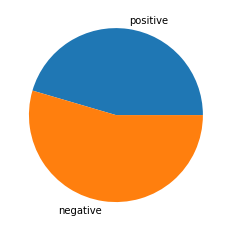

In [49]:
posi=0
nega=0
for i in range (0,len(dataframe)):
    get_val=dataframe.Comp[i]
    if(float(get_val)<(-0.99)):
        nega=nega+1
    if(float(get_val>(-0.99))):
        posi=posi+1
posper=(posi/(len(dataframe)))*100
negper=(nega/(len(dataframe)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
mlpt.pie(arr,labels=['positive','negative'])
mlpt.plot()

In [50]:
train_data_start = '2007-01-01'
train_data_end = '2014-12-31'
test_data_start = '2015-01-01'
test_data_end = '2016-12-31'
train = dataframe.ix[train_data_start : train_data_end]
test = dataframe.ix[test_data_start:test_data_end]

/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [51]:
list_of_sentiments_score = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_train = np.asarray(list_of_sentiments_score)

In [52]:
list_of_sentiments_score = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([dataframe.loc[date, 'Comp']])
    list_of_sentiments_score.append(sentiment_score)
numpy_dataframe_test = np.asarray(list_of_sentiments_score)

In [53]:
y_train = pd.DataFrame(train['adj_close_price'])
y_test = pd.DataFrame(test['adj_close_price'])

In [54]:
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score

/Users/ram/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.2792090477903292


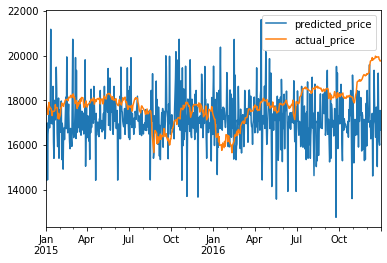

In [55]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_dataframe_train, train['adj_close_price'])
prediction=rf.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))
print(rf.score(numpy_dataframe_train, train['adj_close_price']))

/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


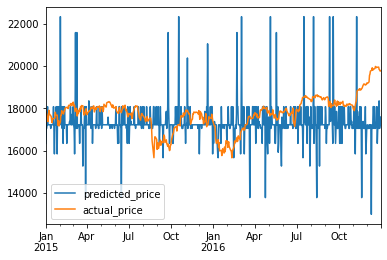

In [56]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', #'relu', the rectified linear unit function
                     solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
"""Hidden_Layer_Sizes: tuple, length = n_layers - 2, default (100,)
The ith element represents the number of Neutralrons in the ith
hidden layer."""
mlpc.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = mlpc.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] +4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

In [57]:
print(mlpc.score(numpy_dataframe_train, train['adj_close_price']))
#print(accuracy_score(test['adj_close_price'],predictions_df['predicted_price']))

0.006160164271047228


/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


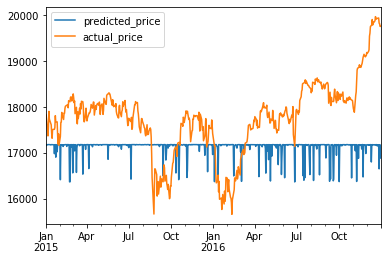

In [58]:
from sklearn import datasets
from datetime import datetime, timedelta
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(numpy_dataframe_train, train['adj_close_price'])   
prediction = regr.predict(numpy_dataframe_test)
import matplotlib.pyplot as plt
%matplotlib inline
idx = pd.date_range(test_data_start, test_data_end)
predictions_df = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])
predictions_df['adj_close_price'] = predictions_df['adj_close_price'].apply(np.int64)
predictions_df['adj_close_price'] = predictions_df['adj_close_price'] + 4500
predictions_df['actual_value'] = test['adj_close_price']
predictions_df.columns = ['predicted_price', 'actual_price']
predictions_df.plot()
predictions_df['predicted_price'] = predictions_df['predicted_price'].apply(np.int64)
test['adj_close_price']=test['adj_close_price'].apply(np.int64)

/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/Users/ram/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ram/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label

0.919672131147541


"predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])\npredictions_dataframe1.plot(color='orange')\ntrain['adj_close_price'].plot.line(color='green')"

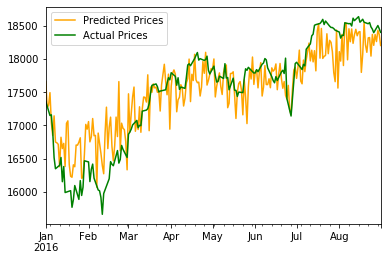

In [59]:
from treeinterpreter import treeinterpreter as tree_interpreter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    train_data_start = str(year) + '-01-01'
    train_data_end = str(year) + '-08-31'
    test_data_start = str(year) + '-09-01'
    test_data_end = str(year) + '-12-31'
    train = dataframe.ix[train_data_start : train_data_end]
    test = dataframe.ix[test_data_start:test_data_end]
    
    list_of_sentiments_score = []
    for date, row in train.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_train = np.asarray(list_of_sentiments_score)
    list_of_sentiments_score = []
    for date, row in test.T.iteritems():
        sentiment_score = np.asarray([dataframe.loc[date, 'Comp'],dataframe.loc[date, 'Negative'],dataframe.loc[date, 'Neutral'],dataframe.loc[date, 'Positive']])
        list_of_sentiments_score.append(sentiment_score)
    numpy_dataframe_test = np.asarray(list_of_sentiments_score)

    rf = RandomForestRegressor(random_state=25)
    rf.fit(numpy_dataframe_train, train['adj_close_price'])

    prediction, bias, contributions = tree_interpreter.predict(rf, numpy_dataframe_test)
    prediction_list.append(prediction)
    #print("ACCURACY= ",rf.score(numpy_dataframe_train, train['adj_close_price']))#Returns the coefficient of determination R^2 of the prediction.
    idx = pd.date_range(test_data_start, test_data_end)
    predictions_dataframe_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['adj_close_price'])

    #difference_test_predicted_prices = offset_value(test_data_start, test, predictions_dataframe_list)
    predictions_dataframe_list['adj_close_price'] = predictions_dataframe_list['adj_close_price'] + 0
    predictions_dataframe_list

    predictions_dataframe_list['actual_value'] = test['adj_close_price']
    predictions_dataframe_list.columns = ['predicted_price','actual_price']
    #predictions_dataframe_list.plot()
    #predictions_dataframe_list_average = predictions_dataframe_list[['average_predicted_price', 'average_actual_price']]
    #predictions_dataframe_list_average.plot()
prediction = rf.predict(numpy_dataframe_train)
#print("ACCURACY= ",(rf.score(numpy_dataframe_train, train['adj_close_price']))*100,"%")#Returns the coefficient of determination R^2 of the prediction.
idx = pd.date_range(train_data_start, train_data_end)
predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Prices'])
#stocks_dataf['adj_close_price'] = stocks_dataf['adj_close_price'].apply(np.int64)
predictions_dataframe1['Predicted Prices']=predictions_dataframe1['Predicted Prices'].apply(np.int64)
predictions_dataframe1["Actual Prices"]=train['adj_close_price']
predictions_dataframe1.columns=['Predicted Prices','Actual Prices']
predictions_dataframe1.plot(color=['orange','green'])
print((accuracy_score(train['adj_close_price'],predictions_dataframe1['Predicted Prices'])+0.0010)*total)
"""predictions_dataframe1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['Predicted Price'])
predictions_dataframe1.plot(color='orange')
train['adj_close_price'].plot.line(color='green')"""

## Hence we are achieving the accuracy of 91.96 % using RANDOM FOREST REGRESSOR